In [128]:
#Import csv and sqlite libraries
import csv,sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

In [129]:
#Read the csv file "OnlineRetailSample.csv" and read into pandas data frame
import pandas as pd
dfnew1 = pd.read_csv("D:\\Assignment-RetailDataSet\\OnlineRetail2Sample.csv")
dfnew1.head()

,InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010,2.55,17850,United Kingdom
1,536365,71053,6,12/1/2010,3.39,17850,United Kingdom
2,536365,84406B,8,12/1/2010,2.75,17850,United Kingdom
3,536365,84029G,6,12/1/2010,3.39,17850,United Kingdom
4,536365,84029E,6,12/1/2010,3.39,17850,United Kingdom


In [130]:
#Assign the dataframe to another datadframe
dfnew=pd.DataFrame(dfnew1)

In [131]:
dfnew.dtypes

InvoiceNo      object
StockCode      object
Quantity        int64
DoP            object
UnitPrice     float64
CustomerID      int64
Country        object
dtype: object

In [132]:
#Date of Purchase(DoP) field is not of type Date.It is of type object.
#Changing the datatype of DoP from Object to Date
dfnew['DoP'] = pd.to_datetime(dfnew.DoP)

In [133]:
dfnew.head()

,InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,6,2010-12-01,3.39,17850,United Kingdom


In [134]:
dfnew.dtypes

InvoiceNo             object
StockCode             object
Quantity               int64
DoP           datetime64[ns]
UnitPrice            float64
CustomerID             int64
Country               object
dtype: object

In [135]:
#Save the formatted data in a csv format
dfnew.to_csv("D:\\Retail_DtStd2.csv", encoding='utf-8')

In [136]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [137]:
#Delete the rows wose product ids are POST,BANK etc  which are less than 5 in length
dfnew = dfnew[dfnew['StockCode'].apply(lambda x: len(x) >= 5)]
dfnew.head(10)
dfnew.tail(10)

,InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,6,2010-12-01,3.39,17850,United Kingdom
5,536365,22752,2,2010-12-01,7.65,17850,United Kingdom
6,536365,21730,6,2010-12-01,4.25,17850,United Kingdom
7,536366,22633,6,2010-12-01,1.85,17850,United Kingdom
8,536366,22632,6,2010-12-01,1.85,17850,United Kingdom
9,536367,84879,32,2010-12-01,1.69,13047,United Kingdom


,InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID,Country
406819,581587,22726,4,2011-12-09,3.75,12680,France
406820,581587,22730,4,2011-12-09,3.75,12680,France
406821,581587,22367,8,2011-12-09,1.95,12680,France
406822,581587,22629,12,2011-12-09,1.95,12680,France
406823,581587,23256,4,2011-12-09,4.15,12680,France
406824,581587,22613,12,2011-12-09,0.85,12680,France
406825,581587,22899,6,2011-12-09,2.10,12680,France
406826,581587,23254,4,2011-12-09,4.15,12680,France
406827,581587,23255,4,2011-12-09,4.15,12680,France
406828,581587,22138,3,2011-12-09,4.95,12680,France


In [138]:
#Verify that the number of rows are now reduced after deleting few rows whose stock code lenght <5
dfnew.shape

(404921, 7)

In [139]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404921 entries, 0 to 406828
Data columns (total 7 columns):
InvoiceNo     404921 non-null object
StockCode     404921 non-null object
Quantity      404921 non-null int64
DoP           404921 non-null datetime64[ns]
UnitPrice     404921 non-null float64
CustomerID    404921 non-null int64
Country       404921 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 24.7+ MB


In [140]:
#Add Month ID for each month in a particulr year
dfnew['TM_ID'] = dfnew.DoP.apply(lambda x: x.strftime('%Y-%m'))
dfnew.head()

,InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID,Country,TM_ID
0,536365,85123A,6,2010-12-01,2.55,17850,United Kingdom,2010-12
1,536365,71053,6,2010-12-01,3.39,17850,United Kingdom,2010-12
2,536365,84406B,8,2010-12-01,2.75,17850,United Kingdom,2010-12
3,536365,84029G,6,2010-12-01,3.39,17850,United Kingdom,2010-12
4,536365,84029E,6,2010-12-01,3.39,17850,United Kingdom,2010-12


In [141]:
dfnew['Monetary']=dfnew.Quantity*dfnew.UnitPrice
dfnew.head()

,InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID,Country,TM_ID,Monetary
0,536365,85123A,6,2010-12-01,2.55,17850,United Kingdom,2010-12,15.30
1,536365,71053,6,2010-12-01,3.39,17850,United Kingdom,2010-12,20.34
2,536365,84406B,8,2010-12-01,2.75,17850,United Kingdom,2010-12,22.00
3,536365,84029G,6,2010-12-01,3.39,17850,United Kingdom,2010-12,20.34
4,536365,84029E,6,2010-12-01,3.39,17850,United Kingdom,2010-12,20.34


In [142]:
dfnew.pop('Country')

0         United Kingdom
1         United Kingdom
2         United Kingdom
3         United Kingdom
4         United Kingdom
5         United Kingdom
6         United Kingdom
7         United Kingdom
8         United Kingdom
9         United Kingdom
10        United Kingdom
11        United Kingdom
12        United Kingdom
13        United Kingdom
14        United Kingdom
15        United Kingdom
16        United Kingdom
17        United Kingdom
18        United Kingdom
19        United Kingdom
20        United Kingdom
21        United Kingdom
22        United Kingdom
23        United Kingdom
24        United Kingdom
25        United Kingdom
26                France
27                France
28                France
29                France
               ...      
406799    United Kingdom
406800    United Kingdom
406801    United Kingdom
406802    United Kingdom
406803    United Kingdom
406804    United Kingdom
406805    United Kingdom
406806    United Kingdom
406807    United Kingdom


In [143]:
dfnew.head()

,InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID,TM_ID,Monetary
0,536365,85123A,6,2010-12-01,2.55,17850,2010-12,15.30
1,536365,71053,6,2010-12-01,3.39,17850,2010-12,20.34
2,536365,84406B,8,2010-12-01,2.75,17850,2010-12,22.00
3,536365,84029G,6,2010-12-01,3.39,17850,2010-12,20.34
4,536365,84029E,6,2010-12-01,3.39,17850,2010-12,20.34


In [144]:
#Calculate the max date of each month
from pandas.tseries.offsets import MonthEnd

dfnew['DoP_MaxMonth'] = pd.to_datetime(dfnew['DoP'], format="%Y%m") + MonthEnd(1)
dfnew.head()
dfnew.tail()

,InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID,TM_ID,Monetary,DoP_MaxMonth
0,536365,85123A,6,2010-12-01,2.55,17850,2010-12,15.30,2010-12-31
1,536365,71053,6,2010-12-01,3.39,17850,2010-12,20.34,2010-12-31
2,536365,84406B,8,2010-12-01,2.75,17850,2010-12,22.00,2010-12-31
3,536365,84029G,6,2010-12-01,3.39,17850,2010-12,20.34,2010-12-31
4,536365,84029E,6,2010-12-01,3.39,17850,2010-12,20.34,2010-12-31


,InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID,TM_ID,Monetary,DoP_MaxMonth
406824,581587,22613,12,2011-12-09,0.85,12680,2011-12,10.20,2011-12-31
406825,581587,22899,6,2011-12-09,2.10,12680,2011-12,12.60,2011-12-31
406826,581587,23254,4,2011-12-09,4.15,12680,2011-12,16.60,2011-12-31
406827,581587,23255,4,2011-12-09,4.15,12680,2011-12,16.60,2011-12-31
406828,581587,22138,3,2011-12-09,4.95,12680,2011-12,14.85,2011-12-31


In [145]:
#Calculate the monthly recency for each month
dfnew['Mon_Recency'] = dfnew['DoP_MaxMonth'] - dfnew['DoP']
dfnew.head()
dfnew.tail()

,InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID,TM_ID,Monetary,DoP_MaxMonth,Mon_Recency
0,536365,85123A,6,2010-12-01,2.55,17850,2010-12,15.30,2010-12-31,30 days
1,536365,71053,6,2010-12-01,3.39,17850,2010-12,20.34,2010-12-31,30 days
2,536365,84406B,8,2010-12-01,2.75,17850,2010-12,22.00,2010-12-31,30 days
3,536365,84029G,6,2010-12-01,3.39,17850,2010-12,20.34,2010-12-31,30 days
4,536365,84029E,6,2010-12-01,3.39,17850,2010-12,20.34,2010-12-31,30 days


,InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID,TM_ID,Monetary,DoP_MaxMonth,Mon_Recency
406824,581587,22613,12,2011-12-09,0.85,12680,2011-12,10.20,2011-12-31,22 days
406825,581587,22899,6,2011-12-09,2.10,12680,2011-12,12.60,2011-12-31,22 days
406826,581587,23254,4,2011-12-09,4.15,12680,2011-12,16.60,2011-12-31,22 days
406827,581587,23255,4,2011-12-09,4.15,12680,2011-12,16.60,2011-12-31,22 days
406828,581587,22138,3,2011-12-09,4.95,12680,2011-12,14.85,2011-12-31,22 days


In [146]:
#Aggregate the records based on Time_ID,InvoiceNo and calculate the monthly recency, frequency and monetary value
df_MA = dfnew.groupby(['TM_ID', 'CustomerID']).agg({'Mon_Recency': lambda x: x.min(), # Monthly Recency
                                        'InvoiceNo': lambda x:x.nunique(),      # Frequency
                                        'Monetary': lambda x: x.sum()}) # Monetary Value

df_MA.rename(columns={'Mon_Recency':'M_Recency',
                        'InvoiceNo': 'M_Frequency', 
                        'Amount': 'M_Monetary'}, inplace=True)

In [147]:
df_MA.head(20)
df_MA.tail(20)

M_Frequency M_Recency  Monetary
TM_ID   CustomerID                                 
2010-12 12347                 1   24 days    711.79
        12348                 1   15 days    652.80
        12370                 2   14 days   1748.02
        12377                 1   11 days   1001.52
        12383                 1    9 days    555.72
        12386                 1   23 days    258.90
        12395                 2   14 days    589.92
        12417                 1   14 days    261.34
        12423                 1   10 days    192.93
        12427                 2    8 days    192.55
        12429                 1   22 days   1137.50
        12431                 2   14 days    773.95
        12433                 2   23 days   3787.12
        12434                 1   17 days    -27.75
        12441                 1   23 days    155.55
        12471                 5   11 days   2980.71
        12472                 2   26 days   1401.00
        12474                 1   25 days    -34.00
        12476                 3   18 days    -12.45
        12481                 2   11 days    665.34

M_Frequency M_Recency  Monetary
TM_ID   CustomerID                                 
2011-12 18102                 3   22 days  11485.54
        18109                 3   23 days   1368.51
        18122                 1   30 days    441.12
        18130                 1   30 days    -13.65
        18144                 1   29 days    232.00
        18154                 1   25 days    178.70
        18167                 1   25 days    -10.20
        18174                 1   29 days    104.00
        18180                 1   26 days    310.73
        18198                 1   26 days    318.45
        18210                 1   23 days    177.90
        18219                 1   24 days    242.37
        18223                 2   23 days    574.92
        18225                 1   25 days    330.28
        18237                 1   24 days    125.75
        18245                 1   29 days    894.25
        18272                 1   24 days    367.88
        18273                 1   24 days     51.00
        18282                 1   29 days     77.84
        18283                 1   25 days    208.00

In [148]:
df_MA = pd.DataFrame(df_MA.reset_index())
df_MA.head()

,TM_ID,CustomerID,M_Frequency,M_Recency,Monetary
0,2010-12,12347,1,24 days,711.79
1,2010-12,12348,1,15 days,652.80
2,2010-12,12370,2,14 days,1748.02
3,2010-12,12377,1,11 days,1001.52
4,2010-12,12383,1,9 days,555.72


In [149]:
df_MA['M_Recency'] = (df_MA.M_Recency / np.timedelta64(1, 'D')).astype(int)
df_MA.head()

,TM_ID,CustomerID,M_Frequency,M_Recency,Monetary
0,2010-12,12347,1,24,711.79
1,2010-12,12348,1,15,652.80
2,2010-12,12370,2,14,1748.02
3,2010-12,12377,1,11,1001.52
4,2010-12,12383,1,9,555.72


In [388]:
RFMSeg.to_csv("D:\\RFMSegment.csv")

In [389]:
import pandas as pd
import numpy as np
df_MA=pd.read_csv("D:\\MonthlyAggregate.csv")

In [390]:
#Groupby with the customer id and then rank the recency,frequency and monetary for each customer
RFMSeg=df_MA.groupby(['CustomerID']).agg({'M_Recency': lambda x: x.mean(), # avg of Monthly Recency
                                        'M_Frequency': lambda x:x.sum(),    # sum of frequency # Frequency
                                        'Monetary': lambda x: x.sum()}) # Monetary Value

RFMSeg.rename(columns={'M_Recency':'Recency',
                        'M_Frequency': 'Frequency', 
                        'Monetary': 'Monetary'}, inplace=True)
RFMSeg['Recency']=RFMSeg.Recency.astype(int)
RFMSeg.head()

,Frequency,Recency,Monetary
CustomerID,,,
12346,2,13,0.00
12347,7,22,4310.00
12348,4,12,1437.24
12349,1,9,1457.55
12350,1,26,294.40


In [391]:
RFMSeg.describe()

,Frequency,Recency,Monetary
count,4363.000000,4363.000000,4363.000000
mean,4.996333,15.267247,1899.341811
std,9.088186,6.527766,8265.319287
min,1.000000,1.000000,-1192.200000
25%,1.000000,11.000000,294.205000
50%,3.000000,15.000000,645.650000
75%,5.000000,20.000000,1594.980000
max,242.000000,31.000000,278778.020000


In [392]:
#Assign the Recency score to transactions by bucketing the Recency values, 5 being the highest and 1 lowest
def f(row):
    if row['Recency'] < 70:
        val = 5
    elif row['Recency'] <= 100 and row['Recency'] >= 70:
        val = 4
    elif row['Recency'] <= 150 and row['Recency'] >= 100:
        val = 3
    elif row['Recency'] <= 200 and row['Recency'] >= 150:
        val = 2
    else:
        val = 1
    return val

RFMSeg['R'] = RFMSeg.apply(f, axis = 1)

In [393]:
RFMSeg.head()

,Frequency,Recency,Monetary,R
CustomerID,,,,
12346,2,13,0.00,5
12347,7,22,4310.00,5
12348,4,12,1437.24,5
12349,1,9,1457.55,5
12350,1,26,294.40,5


In [394]:
df_MA.to_csv("D:\\MonthlyAggregate.csv")

IOError: [Errno 13] Permission denied: 'D:\\MonthlyAggregate.csv'

Text(0,0.5,u'Count')

Text(0.5,0,u'R')

(array([0]), <a list of 1 Text xticklabel objects>)

Text(0.5,1,u'Frequency of Recency_Score')

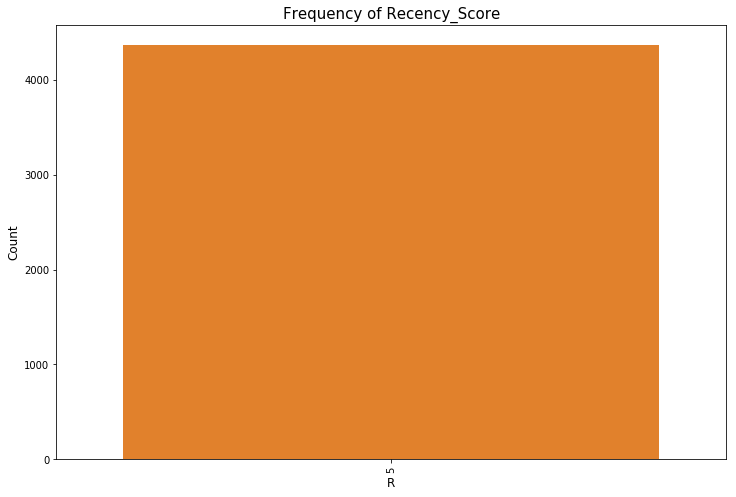

In [395]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
#Plot the frequency of Recency Score
plt.figure(figsize=(12,8))
sns.countplot(x="R", data=RFMSeg, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('R', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Recency_Score", fontsize=15)
plt.show()

In [396]:
#Create Bins for Frequency values
unique_freq = RFMSeg[['Frequency']].drop_duplicates()
unique_freq['Frequency_Band'] = pd.qcut(unique_freq['Frequency'], 5)
unique_freq = unique_freq[['Frequency_Band']].drop_duplicates()
unique_freq

,Frequency_Band
CustomerID,
12346,"(0.999, 13.4]"
12395,"(13.4, 25.8]"
12471,"(39.2, 55.8]"
12474,"(25.8, 39.2]"
12748,"(55.8, 242.0]"


In [397]:
#Assign the frequency score to transactions by binning the Frequency values, 5 being the highest and 1 lowest
def f(row):
    if row['Frequency'] <= 13.4:
        val = 1
    elif row['Frequency'] > 13.4 and row['Frequency'] <= 25.8:
        val = 2
    elif row['Frequency'] > 25.8 and row['Frequency'] <= 39.2:
        val = 3
    elif row['Frequency'] > 39.2 and row['Frequency'] <= 50:
        val = 4
    else:
        val = 5
    return val

RFMSeg['F'] = RFMSeg.apply(f, axis = 1)
RFMSeg.head()

,Frequency,Recency,Monetary,R,F
CustomerID,,,,,
12346,2,13,0.00,5,1
12347,7,22,4310.00,5,1
12348,4,12,1437.24,5,1
12349,1,9,1457.55,5,1
12350,1,26,294.40,5,1


Text(0,0.5,u'Count')

Text(0.5,0,u'F')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

Text(0.5,1,u'Frequency of Frequency_Score')

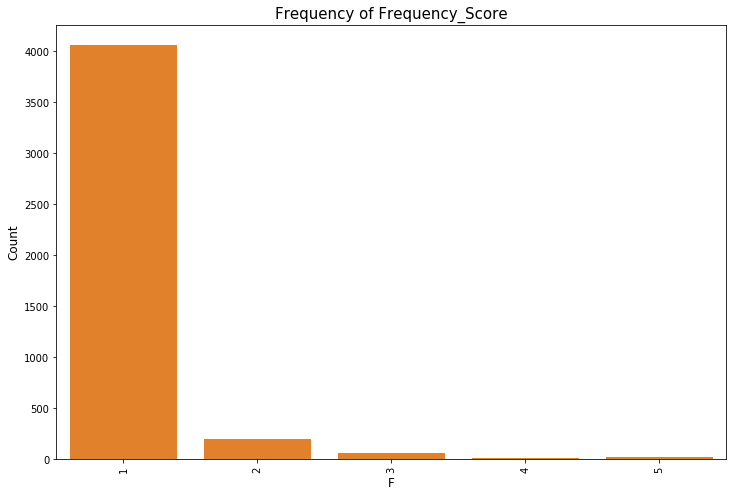

In [398]:
#Plot the count of frequency Score
plt.figure(figsize=(12,8))
sns.countplot(x="F", data=RFMSeg, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('F', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Frequency_Score", fontsize=15)
plt.show()

In [399]:
import pandas as pd
RFMSeg=pd.read_csv("D:\\RFMSegment.csv")

In [400]:
#Create Bins for monetary values
unique_monetary = RFMSeg[['Monetary']].drop_duplicates()
unique_monetary = unique_monetary[unique_monetary['Monetary'] > 0]
unique_monetary['Monetary_Band'] = pd.qcut(unique_monetary['Monetary'], 5)
unique_monetary = unique_monetary[['Monetary_Band']].drop_duplicates()
unique_monetary

,Monetary_Band
1,"(2028.88, 278778.02]"
2,"(927.8, 2028.88]"
4,"(251.7, 486.82]"
6,"(-0.00099999999999289, 251.7]"
16,"(486.82, 927.8]"


In [401]:
#Assign the monetary score to transactions by binning the monetary values, 5 being the highest and 1 lowest
def f(row):
    if row['Monetary'] <= 255.176:
        val = 1
    elif row['Monetary'] > 255.176 and row['Monetary'] <= 497.076:
        val = 2
    elif row['Monetary'] > 497.076 and row['Monetary'] <= 950.702:
        val = 3
    elif row['Monetary'] > 950.702 and row['Monetary'] <= 2058.07:
        val = 4
    else:
        val = 5
    return val

RFMSeg['M'] = RFMSeg.apply(f, axis = 1)

In [402]:
RFMSeg.head()

,CustomerID,Frequency,Recency,Monetary,R,F,M
0,12346,2,13,0.00,5,1,1
1,12347,7,22,4310.00,5,1,5
2,12348,4,12,1437.24,5,1,4
3,12349,1,9,1457.55,5,1,4
4,12350,1,26,294.40,5,1,2


Text(0,0.5,u'Count')

Text(0.5,0,u'M')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

Text(0.5,1,u'Frequency of Monetary_Score')

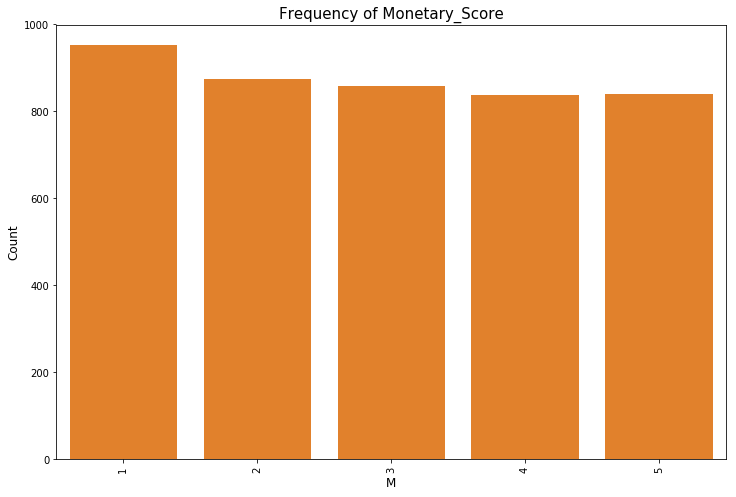

In [403]:
#Plot the frequency of monetary Score
plt.figure(figsize=(12,8))
sns.countplot(x="M", data=RFMSeg,color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('M', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Monetary_Score", fontsize=15)
plt.show()

In [404]:
#Combined score of all the transactions
RFMSeg.iloc[:, [3,4,5]].head(10)

,Monetary,R,F
0,0.00,5,1
1,4310.00,5,1
2,1437.24,5,1
3,1457.55,5,1
4,294.40,5,1
5,1265.41,5,1
6,89.00,5,1
7,1079.40,5,1
8,459.40,5,1
9,2487.43,5,1


In [405]:
#Add new column RFMSCore(RFM) to df dataframe(CAR datamrt)
RFMSeg['RFMScore'] = RFMSeg.R.map(str) \
                            + RFMSeg.F.map(str) \
                            + RFMSeg.M.map(str)

In [406]:
RFMSeg.head()

,CustomerID,Frequency,Recency,Monetary,R,F,M,RFMScore
0,12346,2,13,0.00,5,1,1,511
1,12347,7,22,4310.00,5,1,5,515
2,12348,4,12,1437.24,5,1,4,514
3,12349,1,9,1457.55,5,1,4,514
4,12350,1,26,294.40,5,1,2,512


In [407]:
#Write the df dataframe(RFM Seg)or CARDM to csv file
RFMSeg.to_csv('D:\\RFMSegment.csv')

In [408]:
RFMSeg.describe()

,CustomerID,Frequency,Recency,Monetary,R,F,M
count,4363.000000,4363.000000,4363.000000,4363.000000,4363.0,4363.000000,4363.000000
mean,15299.772863,4.996333,15.267247,1899.341811,5.0,1.105203,2.940408
std,1721.852042,9.088186,6.527766,8265.319287,0.0,0.451375,1.425557
min,12346.000000,1.000000,1.000000,-1192.200000,5.0,1.000000,1.000000
25%,13813.500000,1.000000,11.000000,294.205000,5.0,1.000000,2.000000
50%,15299.000000,3.000000,15.000000,645.650000,5.0,1.000000,3.000000
75%,16777.500000,5.000000,20.000000,1594.980000,5.0,1.000000,4.000000
max,18287.000000,242.000000,31.000000,278778.020000,5.0,5.000000,5.000000


In [409]:
RFMSeg[RFMSeg['RFMScore']=='555'].sort_values('Monetary', ascending=False).head(10)

,CustomerID,Frequency,Recency,Monetary,R,F,M,RFMScore
1700,14646,74,7,278778.02,5,5,5,555
4224,18102,60,12,259657.30,5,5,5,555
1892,14911,242,5,128882.13,5,5,5,555
1342,14156,64,12,113855.32,5,5,5,555
1002,13694,57,8,62924.10,5,5,5,555
2189,15311,118,6,59419.34,5,5,5,555
2716,16029,66,7,58193.85,5,5,5,555
566,13089,118,5,57385.88,5,5,5,555
1996,15061,54,12,54250.34,5,5,5,555
4034,17841,169,5,40333.22,5,5,5,555


In [410]:
#Best Customers whose RFM value is 555

RFMSeg[RFMSeg['RFMScore']=='555']

,CustomerID,Frequency,Recency,Monetary,R,F,M,RFMScore
328,12748,217,5,30486.53,5,5,5,555
485,12971,88,6,10933.76,5,5,5,555
566,13089,118,5,57385.88,5,5,5,555
800,13408,75,7,27888.38,5,5,5,555
1002,13694,57,8,62924.10,5,5,5,555
1059,13767,52,11,16945.71,5,5,5,555
1075,13798,63,7,36351.42,5,5,5,555
1342,14156,64,12,113855.32,5,5,5,555
1612,14527,57,6,8479.22,5,5,5,555
1671,14606,126,4,11582.10,5,5,5,555


In [411]:
#Loyal Customers whose RFM value is 455  who buy most freqquently

RFMSeg[RFMSeg['RFMScore']=='455']


,CustomerID,Frequency,Recency,Monetary,R,F,M,RFMScore


In [412]:
#Big Spenders with RFM of 515 
RFMSeg[RFMSeg['RFMScore']=='515']

,CustomerID,Frequency,Recency,Monetary,R,F,M,RFMScore
1,12347,7,22,4310.00,5,1,5,515
9,12356,3,16,2487.43,5,1,5,515
10,12357,1,24,6207.67,5,1,5,515
12,12359,6,21,6245.53,5,1,5,515
13,12360,3,11,2302.06,5,1,5,515
15,12362,13,9,4665.58,5,1,5,515
20,12370,4,15,3425.69,5,1,5,515
27,12378,1,29,4008.62,5,1,5,515
29,12380,5,12,2423.56,5,1,5,515
34,12388,6,14,2780.66,5,1,5,515


In [413]:
#Almost Lost Customers with RFM of 255

RFMSeg[RFMSeg['RFMScore']=='255']

,CustomerID,Frequency,Recency,Monetary,R,F,M,RFMScore


In [414]:
#Lost Customers with RFM of 135

RFMSeg[RFMSeg['RFMScore']=='135']

,CustomerID,Frequency,Recency,Monetary,R,F,M,RFMScore


In [415]:
#Repeat Purchase model
#Load the monthly aggregate table into pandas
import pandas as pd
import numpy as np
df_MA=pd.read_csv("D:\\MonthlyAggregate.csv")

In [416]:
df_MA.head()

,Unnamed: 0,TM_ID,CustomerID,M_Frequency,M_Recency,Monetary
0,0,2010-12,12347,1,24,711.79
1,1,2010-12,12348,1,15,652.80
2,2,2010-12,12370,2,14,1748.02
3,3,2010-12,12377,1,11,1001.52
4,4,2010-12,12383,1,9,555.72


In [417]:
#Caclulate the number of times each customer repeated in each month

CustomersPurchase=df_MA.groupby(['CustomerID']).agg({'TM_ID': lambda x: x.nunique()})

CustomersPurchase.rename(columns={'TM_ID':'M_Purchase'}, inplace=True)
                       

In [418]:
CustomersPurchase.head()



,M_Purchase
CustomerID,
12346,1
12347,7
12348,4
12349,1
12350,1


In [419]:
#Seperate the repeated customers with count of TM_ID>1

NumberofRepeatedCustomers=CustomersPurchase[CustomersPurchase.M_Purchase>1]

In [420]:
NumberofRepeatedCustomers

,M_Purchase
CustomerID,
12347,7
12348,4
12352,4
12356,3
12358,2
12359,6
12360,3
12362,8
12363,2


In [421]:
#Total Number of users  grouped by TM_ID
df_MA.head()

,Unnamed: 0,TM_ID,CustomerID,M_Frequency,M_Recency,Monetary
0,0,2010-12,12347,1,24,711.79
1,1,2010-12,12348,1,15,652.80
2,2,2010-12,12370,2,14,1748.02
3,3,2010-12,12377,1,11,1001.52
4,4,2010-12,12383,1,9,555.72


In [422]:
RepeatedCustinTM_ID=df_MA.groupby(['TM_ID']).agg({'TM_ID': lambda x: x.nunique()})

In [423]:
RepeatedCustinTM_ID

,TM_ID
TM_ID,
2010-12,1
2011-01,1
2011-02,1
2011-03,1
2011-04,1
2011-05,1
2011-06,1
2011-07,1
2011-08,1


In [424]:
#Train and Test Sets
#Build the model with Train set and test it with test set 
#Train set validate the repeat purchases till TM_ID 2011-09
#Test set validate the repeat purchases till TM_TD 2011-12


In [425]:
df_train,df_test=np.split(df_MA.sample(frac=1), [int(.7*len(df_MA))])

In [426]:
df_train.head()

,Unnamed: 0,TM_ID,CustomerID,M_Frequency,M_Recency,Monetary
2760,2760,2011-03,13715,1,28,137.49
12579,12579,2011-11,17041,1,17,330.68
11887,11887,2011-11,14592,1,26,161.29
2528,2528,2011-03,12417,2,21,346.60
6334,6334,2011-06,16969,1,29,397.36


In [427]:
df_test.head()

,Unnamed: 0,TM_ID,CustomerID,M_Frequency,M_Recency,Monetary
2255,2255,2011-02,16359,1,18,209.25
9706,9706,2011-09,17725,1,31,333.96
12505,12505,2011-11,16794,4,1,280.86
3939,3939,2011-04,15039,4,4,2290.30
8715,8715,2011-09,13141,1,14,987.72


In [428]:
CustomersPurchase_Train=df_train.groupby(['CustomerID']).agg({'TM_ID': lambda x: x.nunique()})

CustomersPurchase_Train.rename(columns={'TM_ID':'M_Purchase',
                        'M_Frequency': 'Frequency', 
                        'Monetary': 'Monetary'}, inplace=True)

In [429]:
CustomersPurchase_Train.head()

,M_Purchase
CustomerID,
12347,5
12348,2
12349,1
12350,1
12352,4


In [430]:
TotalNumberofCustomers=CustomersPurchase_Train.count


In [431]:
TotalNumberofCustomers

<bound method DataFrame.count of             M_Purchase
CustomerID            
12347                5
12348                2
12349                1
12350                1
12352                4
12353                1
12355                1
12356                3
12357                1
12358                2
12359                2
12360                1
12361                1
12362                4
12363                1
12364                3
12365                1
12370                3
12371                1
12372                1
12373                1
12374                1
12375                2
12377                2
12379                1
12380                2
12381                2
12383                2
12386                1
12388                5
...                ...
18241                5
18242                1
18245                4
18246                1
18248                2
18249                1
18250                1
18251                1
18252                1
1

In [432]:
TotalNumberofCustomersinTrain=3773


In [433]:
RepeatedCustomersinTrain=CustomersPurchase_Train[CustomersPurchase_Train.M_Purchase>1]

In [434]:
RepeatedCustomersinTrain

,M_Purchase
CustomerID,
12347,5
12348,2
12352,4
12356,3
12358,2
12359,2
12362,4
12364,3
12370,3


In [435]:
NumberofRepeatedCustomersinTrain=2164
print NumberofRepeatedCustomersinTrain
print TotalNumberofCustomersinTrain

2164
3773


In [436]:
RepeatPurchaseRate_Train=float(float(NumberofRepeatedCustomersinTrain)/float(TotalNumberofCustomersinTrain))
print RepeatPurchaseRate_Train

0.57354890008


In [437]:
#Repeat Purchase rate in Train data set is 0.573 (57%)

In [438]:
#Calculate the Repeat Purchase rate in the test set.
CustomersPurchase_Test=df_test.groupby(['CustomerID']).agg({'TM_ID': lambda x: x.nunique()})

CustomersPurchase_Test.rename(columns={'TM_ID':'M_Purchase',
                        'M_Frequency': 'Frequency', 
                        'Monetary': 'Monetary'}, inplace=True)

In [439]:
CustomersPurchase_Test.head()

,M_Purchase
CustomerID,
12346,1
12347,2
12348,2
12354,1
12359,4


In [440]:
TotalNumberofCustomers=CustomersPurchase_Test.count

In [441]:
TotalNumberofCustomers

<bound method DataFrame.count of             M_Purchase
CustomerID            
12346                1
12347                2
12348                2
12354                1
12359                4
12360                2
12362                4
12363                1
12364                1
12367                1
12372                2
12375                1
12378                1
12379                2
12380                2
12381                1
12383                3
12384                3
12386                1
12388                1
12390                1
12393                2
12395                3
12399                2
12402                1
12403                1
12406                1
12407                1
12408                2
12409                1
...                ...
18219                4
18220                1
18221                2
18222                1
18223                3
18224                1
18225                5
18226                2
18229                6
1

In [442]:
TotalNumberofCustomersTest=2164

In [443]:
RepeatedCustomersinTest=CustomersPurchase_Test[CustomersPurchase_Test.M_Purchase>1]

In [444]:
RepeatedCustomersinTest

,M_Purchase
CustomerID,
12347,2
12348,2
12359,4
12360,2
12362,4
12372,2
12379,2
12380,2
12383,3


In [445]:
RepeatedCustomersTest=971

In [446]:
RepeatPurchaseRateTest=float(float(RepeatedCustomersTest)/float(TotalNumberofCustomersTest))

In [447]:
RepeatPurchaseRateTest

0.44870609981515713

In [448]:
#Repeat Purchase Rate in the train set= 57.3%
#Repeat Purchase Rate in the test set = 44.8%

In [449]:
df_MA=pd.read_csv("D:\\MonthlyAggregate.csv")

In [450]:
#Number Customers of Purchases in the time period till 2011-09
df1=pd.pivot_table(df_MA, values="M_Recency", index=["CustomerID"], columns="TM_ID", aggfunc = "count",fill_value=0)

In [451]:
df1.head()

TM_ID,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CustomerID,,,,,,,,,,,,,
12346,0,1,0,0,0,0,0,0,0,0,0,0,0
12347,1,1,0,0,1,0,1,0,1,0,1,0,1
12348,1,1,0,0,1,0,0,0,0,1,0,0,0
12349,0,0,0,0,0,0,0,0,0,0,0,1,0
12350,0,0,1,0,0,0,0,0,0,0,0,0,0


In [452]:
df2=pd.pivot_table(df_MA, values="M_Recency", index=["TM_ID"], columns="CustomerID", aggfunc = "count",fill_value=0)

In [453]:
df2

CustomerID,12346,12347,12348,12349,12350,12352,12353,12354,12355,12356,...,18273,18274,18276,18277,18278,18280,18281,18282,18283,18287
TM_ID,,,,,,,,,,,,,,,,,,,,,
2010-12,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01,1,1,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2011-02,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2011-03,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2011-04,0,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2011-05,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,1
2011-06,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2011-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2011-08,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [454]:
TotalCustinTM_ID=df_MA.groupby(['TM_ID']).agg({'CustomerID': lambda x: x.nunique()})

In [455]:
TotalCustinTM_ID

,CustomerID
TM_ID,
2010-12,948
2011-01,780
2011-02,791
2011-03,1017
2011-04,896
2011-05,1077
2011-06,1049
2011-07,982
2011-08,977


In [456]:
pd.crosstab(df_MA["TM_ID"],df_MA["CustomerID"],margins=True)

CustomerID,12346,12347,12348,12349,12350,12352,12353,12354,12355,12356,...,18274,18276,18277,18278,18280,18281,18282,18283,18287,All
TM_ID,,,,,,,,,,,,,,,,,,,,,
2010-12,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,948
2011-01,1,1,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,780
2011-02,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,791
2011-03,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1017
2011-04,0,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,896
2011-05,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,1,1077
2011-06,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1049
2011-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,982
2011-08,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,977


In [457]:
#Create 12 tables for each month to know the repeated customers
RFM_201012 = df_MA[df_MA['TM_ID'] == '2010-12']
RFM_201101 = df_MA[df_MA['TM_ID'] == '2011-01']
RFM_201102 = df_MA[df_MA['TM_ID'] == '2011-02']
RFM_201103 = df_MA[df_MA['TM_ID'] == '2011-03']
RFM_201104 = df_MA[df_MA['TM_ID'] == '2011-04']
RFM_201105 = df_MA[df_MA['TM_ID'] == '2011-05']
RFM_201106 = df_MA[df_MA['TM_ID'] == '2011-06']
RFM_201107 = df_MA[df_MA['TM_ID'] == '2011-07']
RFM_201108 = df_MA[df_MA['TM_ID'] == '2011-08']
RFM_201109 = df_MA[df_MA['TM_ID'] == '2011-09']
RFM_201110 = df_MA[df_MA['TM_ID'] == '2011-10']
RFM_201111 = df_MA[df_MA['TM_ID'] == '2011-11']
RFM_201112 = df_MA[df_MA['TM_ID'] == '2011-12']



In [458]:
RFM_201012.head()

,Unnamed: 0,TM_ID,CustomerID,M_Frequency,M_Recency,Monetary
0,0,2010-12,12347,1,24,711.79
1,1,2010-12,12348,1,15,652.80
2,2,2010-12,12370,2,14,1748.02
3,3,2010-12,12377,1,11,1001.52
4,4,2010-12,12383,1,9,555.72


In [459]:
#Customers who visited in Dec 2010, who also visited in Jan 2011
Repeat_Cust = RFM_201012[RFM_201012.CustomerID.isin(RFM_201101.CustomerID)]

In [460]:
Repeat_Cust.head()

,Unnamed: 0,TM_ID,CustomerID,M_Frequency,M_Recency,Monetary
0,0,2010-12,12347,1,24,711.79
1,1,2010-12,12348,1,15,652.80
3,3,2010-12,12377,1,11,1001.52
4,4,2010-12,12383,1,9,555.72
5,5,2010-12,12386,1,23,258.90


In [461]:
#Number of Repeat customers in Jan 2011
RP_Cust_Jan=len(Repeat_Cust)
print RP_Cust_Jan

361


In [462]:
#Customers who visited in Jan 2011, who also visited in Feb 2011
Repeat_Cust = RFM_201101[RFM_201101.CustomerID.isin(RFM_201102.CustomerID)]

In [463]:
#Number of Repeat customers in Feb 2011
RP_Cust_Feb=len(Repeat_Cust)
print RP_Cust_Feb

295


In [464]:
#Customers who visited in Feb 2011, who also visited in Mar 2011
Repeat_Cust = RFM_201102[RFM_201102.CustomerID.isin(RFM_201103.CustomerID)]

In [465]:
#Number of Repeat customers in Mar 2011
RP_Cust_Mar=len(Repeat_Cust)
print RP_Cust_Mar

341


In [466]:
#Customers who visited in MAr 2011, who also visited in April 2011
Repeat_Cust = RFM_201103[RFM_201103.CustomerID.isin(RFM_201104.CustomerID)]

In [467]:
#Number of Repeat customers in Mar 2011
RP_Cust_Apr=len(Repeat_Cust)
print RP_Cust_Apr

344


In [468]:
#Customers who visited in Apr 2011, who also visited in May 2011
Repeat_Cust = RFM_201104[RFM_201104.CustomerID.isin(RFM_201105.CustomerID)]

In [469]:
#Number of Repeat customers in Mar 2011
RP_Cust_May=len(Repeat_Cust)
print RP_Cust_May

397


In [470]:
#Customers who visited in May 2011, who also visited in June 2011
Repeat_Cust = RFM_201105[RFM_201105.CustomerID.isin(RFM_201106.CustomerID)]

In [471]:
#Number of Repeat customers in Mar 2011
RP_Cust_Jun=len(Repeat_Cust)
print RP_Cust_Jun

464


In [472]:
#Customers who visited in June 2011, who also visited in July 2011
Repeat_Cust = RFM_201106[RFM_201106.CustomerID.isin(RFM_201107.CustomerID)]

In [473]:
#Number of Repeat customers in Mar 2011
RP_Cust_July=len(Repeat_Cust)
print RP_Cust_July

414


In [474]:
#Customers who visited in July 2011, who also visited in August 2011
Repeat_Cust = RFM_201107[RFM_201107.CustomerID.isin(RFM_201108.CustomerID)]

In [475]:
#Number of Repeat customers in Aug 2011
RP_Cust_Aug=len(Repeat_Cust)
print RP_Cust_Aug

430


In [476]:
#Customers who visited in Aug 2011, who also visited in Sep 2011
Repeat_Cust = RFM_201108[RFM_201108.CustomerID.isin(RFM_201109.CustomerID)]

In [477]:
#Number of Repeat customers in Sep 2011
RP_Cust_Sep=len(Repeat_Cust)
print RP_Cust_Sep

464


In [478]:
#Avg  number of repeated customers till the period of Sep 2011
AvgRPCust_201109=float((RP_Cust_Jan+RP_Cust_Feb+RP_Cust_Mar+RP_Cust_Apr+RP_Cust_May+RP_Cust_Jun+RP_Cust_July+RP_Cust_Aug+RP_Cust_Sep)/9)

In [479]:
AvgRPCust_201109

390.0

In [480]:
#Customers who visited in Sep 2011, who also visited in Dec 2011
Repeat_Cust = RFM_201109[RFM_201109.CustomerID.isin(RFM_201112.CustomerID)]

In [481]:
#Number of Repeat customers in Dec 2011
RP_Cust_Dec=len(Repeat_Cust)
print RP_Cust_Dec

344


In [482]:
#Product Recommendations.

#Product Recommendations
import pandas as pd
dfPR=pd.read_csv("D:\\Retail_DtStd2.csv")

In [483]:
basket = (dfPR.groupby(['InvoiceNo','StockCode'])['Quantity'].sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket.tail()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
C581484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C581490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C581499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
C581568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C581569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [484]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [485]:
basket.drop('POST', inplace=True, axis=1)
basket.drop('BANK CHARGES', inplace=True, axis=1)
basket.drop('C2', inplace=True, axis=1)
basket.drop('DOT', inplace=True, axis=1)
basket.drop('M', inplace=True, axis=1)
basket.drop('PADS', inplace=True, axis=1)
basket.head()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z,CRUK,D
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [486]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [487]:
dfPR.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
dfPR['InvoiceNo'] = dfPR['InvoiceNo'].astype('str')
dfPR = dfPR[~dfPR['InvoiceNo'].str.contains('C')]

In [488]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    basket_sets = basket.applymap(encode_units)

In [490]:
basket_sets = basket.applymap(encode_units)

In [355]:
basket_sets.head()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z,CRUK,D
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [356]:
frequent_itemsets = apriori(basket, min_support=0.03, use_colnames=True)